In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.optimize import curve_fit
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,     # linewidth
    'text.usetex': True,      # LaTeX font
    'font.family': 'serif',   # Serif family
    'font.size': 16,          # font size
    'axes.titlesize': 18,     # title size
    'axes.grid': True,        # grid
    'grid.linestyle': "-.",   # grid style
})

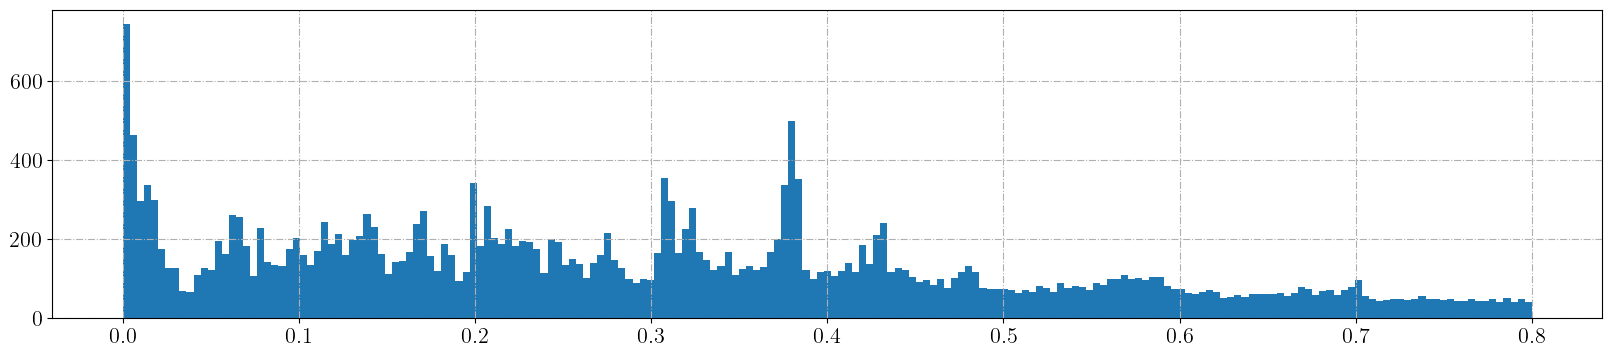

In [ ]:
# Files
data = [ pd.read_csv(f'm{i}.csv', header = None) for i in range(1, 24) ]

concatenated_data = pd.concat(data, ignore_index = True)

# Histogram
bins = np.linspace(0, 0.8, 200)
figure = concatenated_data.set_index(3)[4].hist(bins = bins, figsize = (20, 4))
plt.show()

# data[0].hist()

In [44]:
# max_values_per_bin
ax = figure  # Assuming a single histogram
hist_data = ax.patches

bin_edges = bins
bin_heights = [patch.get_height() for patch in hist_data]

In [91]:
# bin_heights

gaussians = [ (0.36, 0.40) ]

def Gauss(x, sigma, C, A):
    y = np.exp(-(x - C) ** 2 / (2 * sigma ** 2))
    y = y / np.max(y)
    return A * y
# params, errors = curve_fit(Gauss, xdata, ydata)

<Axes: xlabel='x'>

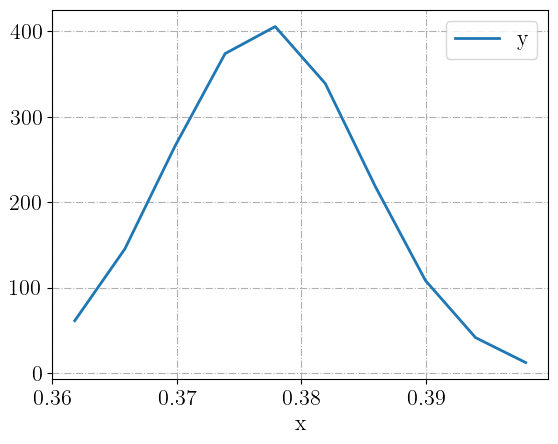

In [92]:
hist_df = pd.DataFrame({'x': bins[0:-1], 'y': bin_heights})
single_gauss_df = hist_df.loc[ (hist_df['x']>=gaussians[0][0]) & (hist_df['x']<=gaussians[0][1]) ]
params, errors = curve_fit(Gauss, single_gauss_df['x'], single_gauss_df['y'], p0 = [1, np.mean(gaussians[0]), np.mean(single_gauss_df['y'])])
fit_gauss_df = Gauss(single_gauss_df['x'], *params)
fit_gauss_df = pd.DataFrame({'x': single_gauss_df['x'], 'y': fit_gauss_df.values})
fit_gauss_df.set_index('x').plot()

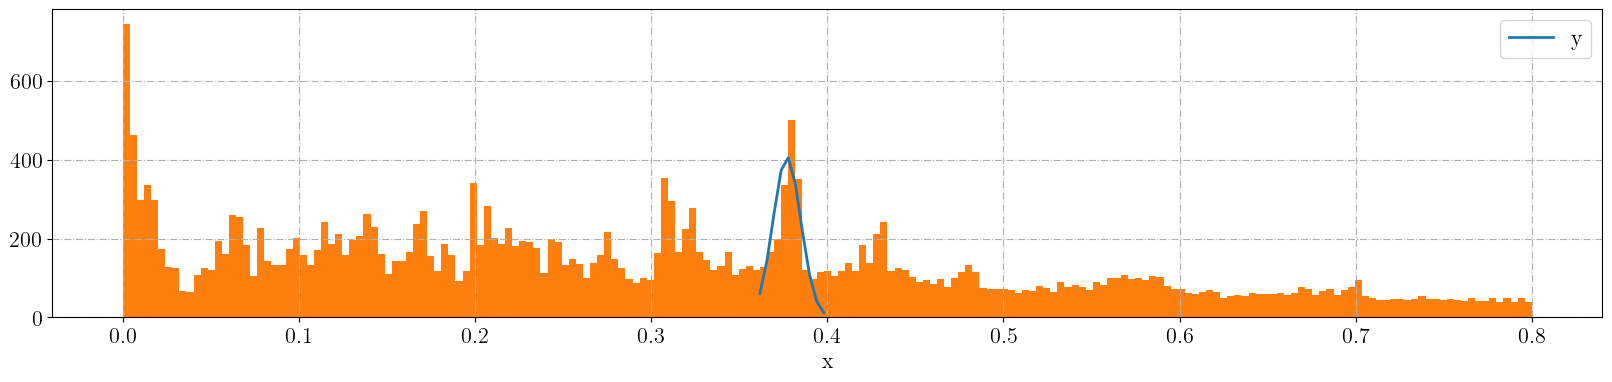

In [94]:
fit_gauss_df.set_index('x').plot()
concatenated_data.set_index(3)[4].hist(bins = bins, figsize = (20, 4))
plt.show()